### COVID-19 Positive Cases Increase Death?

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
covid = pd.read_csv("covid-states.csv")
covid.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-12-02,AK,A,122.0,122.0,0,NaN,768.0,768.0,164.0,...,1024643.0,6015,NaN,NaN,NaN,NaN,NaN,0,1024643.0,6015
1,2020-12-02,AL,A,3711.0,3326.0,73,385.0,25821.0,25821.0,1801.0,...,1603523.0,9681,NaN,NaN,73187.0,NaN,1603523.0,9681,NaN,0
2,2020-12-02,AR,A+,2522.0,2312.0,10,210.0,9110.0,9110.0,1088.0,...,1703266.0,11813,NaN,21856.0,NaN,144866.0,NaN,0,1703266.0,11813
3,2020-12-02,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,...,1988.0,0,NaN,NaN,NaN,NaN,NaN,0,1988.0,0
4,2020-12-02,AZ,A+,6739.0,6237.0,52,502.0,26312.0,26312.0,2699.0,...,2288204.0,16290,365871.0,NaN,NaN,NaN,2288204.0,16290,NaN,0


In [3]:
print("Size/Shape of the dataset",covid.shape)
print("Checking for null values:\n",covid.isnull().sum())
print("Checking Data-type:",covid.dtypes)

Size/Shape of the dataset (15409, 42)
Checking for null values:
 date                                    0
state                                   0
dataQualityGrade                     1261
death                                 826
deathConfirmed                       8691
deathIncrease                           0
deathProbable                       10413
hospitalized                         6127
hospitalizedCumulative               6127
hospitalizedCurrently                3105
hospitalizedIncrease                    0
inIcuCumulative                     12757
inIcuCurrently                       7939
negative                              308
negativeIncrease                        0
negativeTestsAntibody               14438
negativeTestsPeopleAntibody         14657
negativeTestsViral                  12154
onVentilatorCumulative              14496
onVentilatorCurrently                9326
positive                              150
positiveCasesViral                   3509
positiveInc

In [4]:
#Dropping the column SNO
covid.drop(["dataQualityGrade"],1,inplace = True)

In [5]:
#Data Analysis for Washington DC
dc_data = covid[covid["state"]=="DC"]
dc_data.head()

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
8,2020-12-02,DC,690.0,NaN,5,NaN,NaN,NaN,165.0,0,...,701485.0,4076,NaN,NaN,NaN,NaN,308164.0,828,NaN,0
64,2020-12-01,DC,685.0,NaN,5,NaN,NaN,NaN,160.0,0,...,697409.0,2153,NaN,NaN,NaN,NaN,307336.0,889,NaN,0
120,2020-11-30,DC,680.0,NaN,0,NaN,NaN,NaN,158.0,0,...,695256.0,4914,NaN,NaN,NaN,NaN,306447.0,884,NaN,0
176,2020-11-29,DC,680.0,NaN,2,NaN,NaN,NaN,145.0,0,...,690342.0,5004,NaN,NaN,NaN,NaN,305563.0,1530,NaN,0
232,2020-11-28,DC,678.0,NaN,1,NaN,NaN,NaN,157.0,0,...,685338.0,12899,NaN,NaN,NaN,NaN,304033.0,4071,NaN,0


In [6]:
dc_drop = dc_data.fillna(0)
dc_drop.head()

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
8,2020-12-02,DC,690.0,0.0,5,0.0,0.0,0.0,165.0,0,...,701485.0,4076,0.0,0.0,0.0,0.0,308164.0,828,0.0,0
64,2020-12-01,DC,685.0,0.0,5,0.0,0.0,0.0,160.0,0,...,697409.0,2153,0.0,0.0,0.0,0.0,307336.0,889,0.0,0
120,2020-11-30,DC,680.0,0.0,0,0.0,0.0,0.0,158.0,0,...,695256.0,4914,0.0,0.0,0.0,0.0,306447.0,884,0.0,0
176,2020-11-29,DC,680.0,0.0,2,0.0,0.0,0.0,145.0,0,...,690342.0,5004,0.0,0.0,0.0,0.0,305563.0,1530,0.0,0
232,2020-11-28,DC,678.0,0.0,1,0.0,0.0,0.0,157.0,0,...,685338.0,12899,0.0,0.0,0.0,0.0,304033.0,4071,0.0,0


<Figure size 1440x720 with 0 Axes>

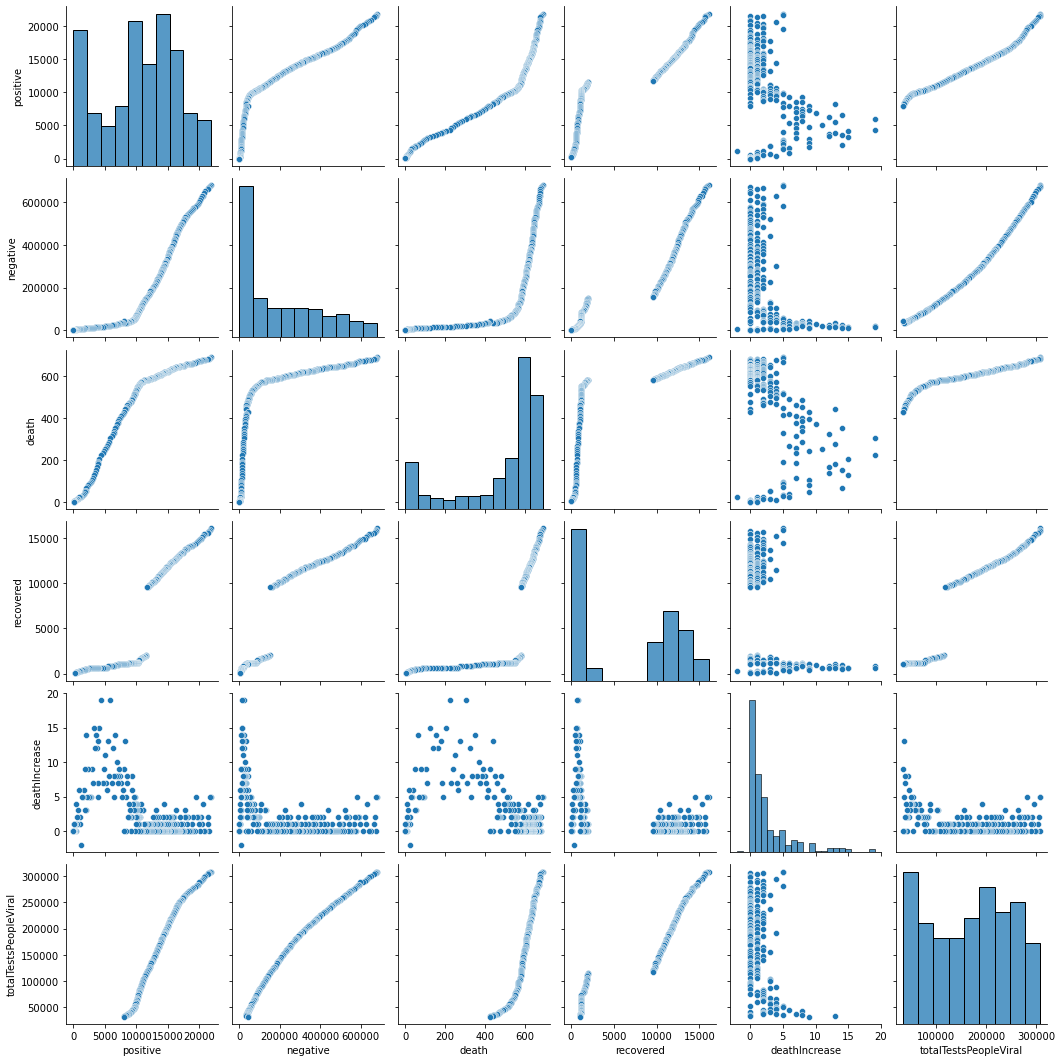

In [7]:
data_numeric = dc_data[['positive','negative','death','recovered','deathIncrease','totalTestsPeopleViral']]
plt.figure(figsize=(20, 10))
sns.pairplot(data_numeric)
plt.show()

## Modelling data with NAN values

In [8]:
X = dc_data['positive'].values.reshape(-1,1)
y = dc_data['deathIncrease'].values.reshape(-1,1)

### Split our data into training and testing

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
model = LinearRegression()
model

LinearRegression()

In [11]:
model.fit(X_train, y_train)

LinearRegression()

In [12]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.12306819946237246
Testing Data Score: 0.1410613095543013


In [13]:
predictions = reg.predict(X)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='black'
)
plt.plot(
    X,
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Positive")
plt.ylabel("Death Increase")
plt.show()

NameError: name 'reg' is not defined

In [ ]:
poly = PolynomialFeatures(degree =4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 
pred = lin2.predict(X_poly)
new_X, new_y = zip(*sorted(zip(X, pred)))
plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='black'
)
plt.plot(
    new_X, new_y,
    c='blue'
)
plt.xlabel("Positive")
plt.ylabel("Death Increase")
plt.show()

### Modelling data with NAN values set as 0

In [ ]:
X = dc_drop['positive'].values.reshape(-1,1)
y = dc_drop['deathIncrease'].values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
model2 = LinearRegression()
model2

In [ ]:
model2.fit(X_train, y_train)

In [ ]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

In [ ]:
predictions = model2.predict(X)
print("The linear model is: Y = {:.5} + {:.5}X".format(model2.intercept_[0], model2.coef_[0][0]))
plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='black'
)
plt.plot(
    X,
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Positive")
plt.ylabel("Death Increase")
plt.show()